<a href="https://colab.research.google.com/github/joaogabrielanuto/codigos-conteudos-trading-com-dados/blob/main/ibov_dolarizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg" width="300" align="left"/>

---

# **Calculando o IBOV dolarizado**

## **1. Instalando e importando bibliotecas**

In [1]:
!pip install yfinance --quiet

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

## **2. Definir Período**

In [3]:
start_date = '2007-01-01'
end_date = '2023-08-04'

## **3. Extrair e manipular dados**

In [4]:
# Obter os dados do Ibovespa e do dólar em reais
ibov_data = yf.download('^BVSP', start=start_date,
                        end=end_date)['Adj Close']

usd_brl_data = yf.download('USDBRL=X', start=start_date,
                           end=end_date)['Adj Close']

# Transformar de Series para DataFrame
ibov_df = pd.DataFrame(ibov_data)
ibov_df.columns = ['IBOV']

usd_brl_df = pd.DataFrame(usd_brl_data)
usd_brl_df.columns = ['USDBRL']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
ibov_df.head()

,IBOV
Date,
2007-01-02,45383.0
2007-01-03,44445.0
2007-01-04,44020.0
2007-01-05,42245.0
2007-01-08,42830.0


In [6]:
usd_brl_df.head()

,USDBRL
Date,
2007-01-01,2.1325
2007-01-02,2.1310
2007-01-03,2.1345
2007-01-04,2.1390
2007-01-05,2.1470


In [7]:
# juntando os dois DataFrames com Merge
ibov_usd = pd.merge(ibov_df,
                    usd_brl_df,
                    left_index=True,
                    right_index=True,
                    how='inner')

# dividindo o IBOV pelo valor do dólar
#para obter o IBOV dolarizado
ibov_usd['IBOV_USD'] = ibov_usd['IBOV'] / ibov_usd['USDBRL']
ibov_usd

,IBOV,USDBRL,IBOV_USD
Date,,,
2007-01-02,45383.0,2.1310,21296.573959
2007-01-03,44445.0,2.1345,20822.206345
2007-01-04,44020.0,2.1390,20579.710732
2007-01-05,42245.0,2.1470,19676.291819
2007-01-08,42830.0,2.1465,19953.411504
...,...,...,...
2023-07-28,120187.0,4.7416,25347.350909
2023-07-31,121943.0,4.7233,25817.331212
2023-08-01,121248.0,4.7247,25662.581892


In [8]:
# dividindo o IBOV pelo valor do dólar para obter o IBOV dolarizado
ibov_usd['IBOV_USD'] = ibov_usd['IBOV'] / ibov_usd['USDBRL']
ibov_usd

,IBOV,USDBRL,IBOV_USD
Date,,,
2007-01-02,45383.0,2.1310,21296.573959
2007-01-03,44445.0,2.1345,20822.206345
2007-01-04,44020.0,2.1390,20579.710732
2007-01-05,42245.0,2.1470,19676.291819
2007-01-08,42830.0,2.1465,19953.411504
...,...,...,...
2023-07-28,120187.0,4.7416,25347.350909
2023-07-31,121943.0,4.7233,25817.331212
2023-08-01,121248.0,4.7247,25662.581892


## **4. Plot**

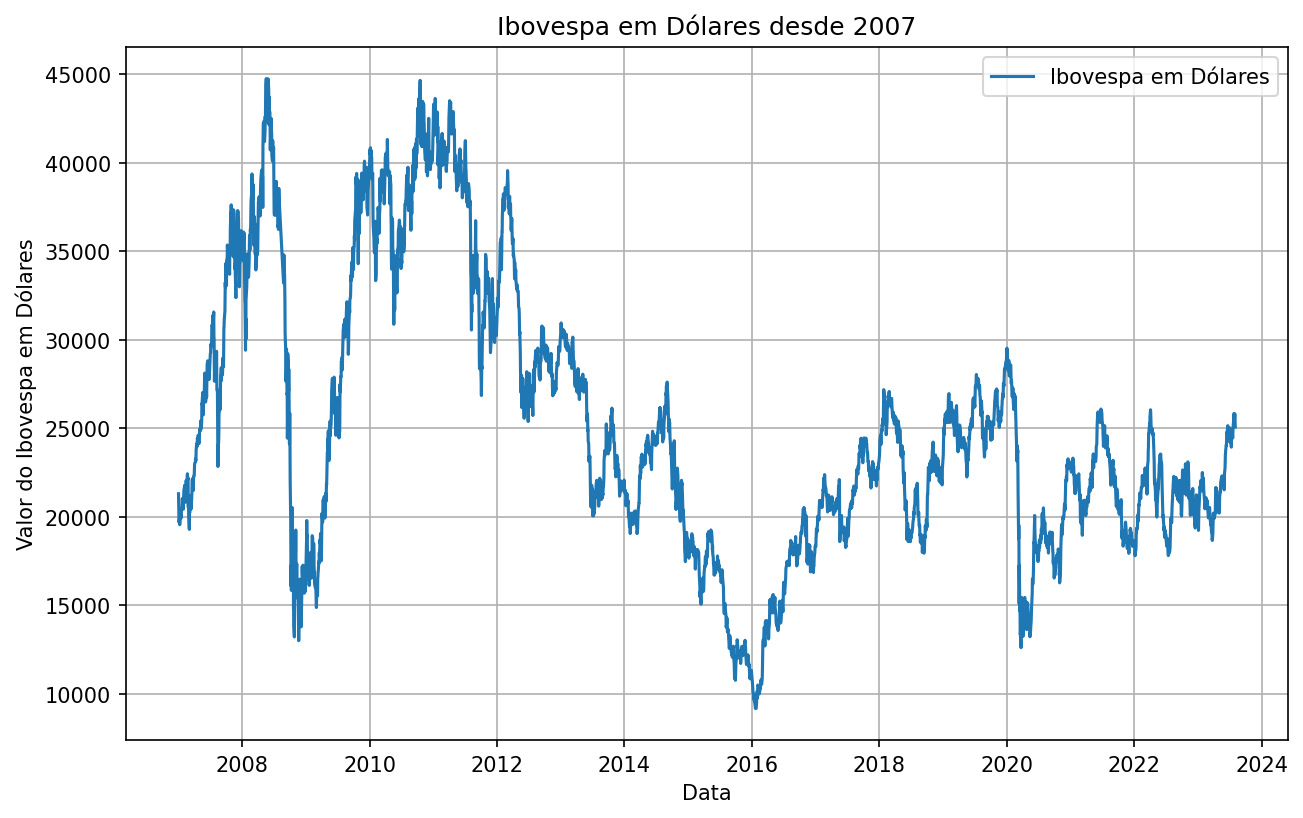

In [20]:
plt.figure(figsize=(10, 6), dpi=150)
plt.plot(ibov_usd.index, ibov_usd['IBOV_USD'],
         label='Ibovespa em Dólares')
plt.xlabel('Data')
plt.ylabel('Valor do Ibovespa em Dólares')
plt.title('Ibovespa em Dólares desde ' + start_date[:4])
plt.legend()
plt.grid(True)
plt.show()

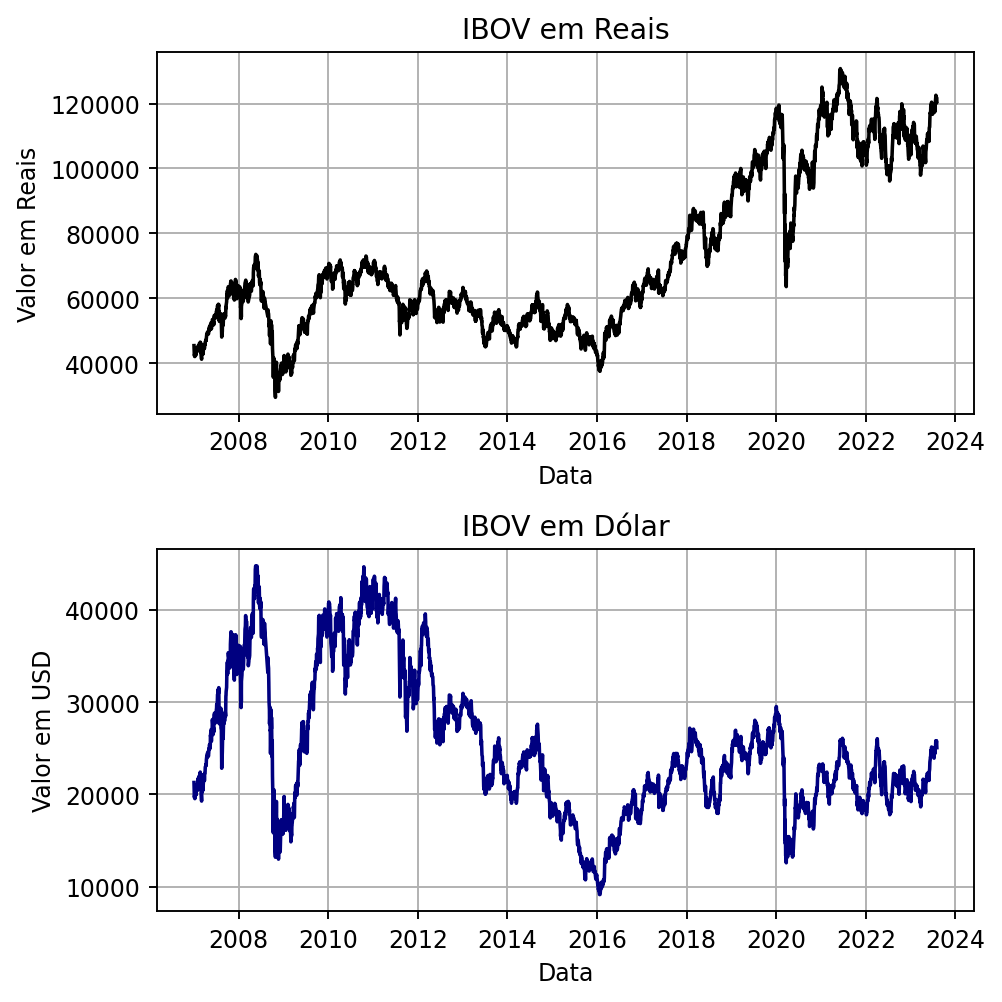

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), dpi=170)

# Plot do primeiro gráfico
ax1.plot(ibov_usd.index, ibov_usd['IBOV'],
         label='IBOV em Reais',
         color='black')
ax1.set_xlabel('Data')
ax1.set_ylabel('Valor em Reais')
ax1.set_title('IBOV em Reais')
ax1.grid(True)

# Plot do segundo gráfico
ax2.plot(ibov_usd.index, ibov_usd['IBOV_USD'],
         label='IBOV em Dólar',
         color='navy')
ax2.set_xlabel('Data')
ax2.set_ylabel('Valor em USD')
ax2.set_title('IBOV em Dólar')
ax2.grid(True)

# Ajuste para evitar sobreposição
plt.tight_layout()

plt.show()